#                                                       MOBILE PRICE PREDICTION

## INTRODUCE

Bob telah memulai perusahaan selulernya sendiri. Dia ingin memberikan perlawanan keras kepada perusahaan besar seperti Apple, Samsung dll.

Dia tidak tahu bagaimana memperkirakan harga ponsel yang dibuat perusahaannya. Di pasar telepon selular yang kompetitif Anda tidak bisa hanya berasumsi. Untuk mengatasi masalah ini ia mengumpulkan data penjualan ponsel dari berbagai perusahaan.

Bob ingin mengetahui hubungan antara fitur-fitur sebuah ponsel (misalnya: - RAM, Memori Internal, dll) dan harga jualnya. Tapi dia tidak begitu pandai dalam Machine Learning. Jadi dia membutuhkan bantuan Anda untuk menyelesaikan masalah ini.

Dalam tahapan membuat model AI yang diinginkan, kita perlu melalui beberapa tahapan berikut:
1. Preparing data
2. Preprocessing data
3. Training and Evaluasi model
4. Prediction values

In [92]:
import warnings
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd   
import matplotlib as mlp
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_validate

#untuk visualisasi 
import plotly.express as px



In [12]:
%notebook matplotlib
from warnings import filterwarnings
filterwarnings('ignore')

## Tahapan pertama : Preparing data

In [16]:
path1 = 'D:\Skirpsi\Train.csv'
path2 = 'D:\Skirpsi\Test.csv'
train = pd.read_csv(path1)
test = pd.read_csv(path2)

In [17]:
train

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0       0.6        188        2  ...         20       756  2549     9     7   
1       0.7        136        3  ...        905      1988  2631    17     3   
2       0.9        145        5  ...       1263      1716  2603    11     2   
3       0.8        131        6  ...       1216      1786  2769    16     8   
4       0.6        141        2  ...       1208      1212  1411     8     2   
...     ...        ...      ...  ...        ...       ...   ...   ...   ...   
1995    0.8        106        6  ...       1222      1890   668    13     4   
1996    0.2        187        4  ...        915      1965  2032    11    10   
1997    0.7        108        8  ...        868      1632  3057     9     1   
1998    0.1        145        5  ...        336       670   869    18    10   
1999    0.9        168        6  ...        483       754  3919    19     4   

      talk_time  three_g  touch_screen  wifi  price_range  
0            19        0             0     1            1  
1             7        1             1     0            2  
2             9        1             1     0            2  
3            11        1             0     0            2  
4            15        1             1     0            1  
...         ...      ...           ...   ...          ...  
1995         19        1             1     0            0  
1996         16        1             1     1            2  
1997          5        1             1     0            3  
1998         19        1             1     1            0  
1999          2        1             1     1            3  

[2000 rows x 21 columns]

VARIABLE

1. **id** = ID
2. **battery_power**:Total energi yang dapat disimpan baterai dalam satu waktu diukur dalam mAh
3. **blue**: Memiliki bluetooth atau tidak
4. **clock_speed**:kecepatan mikroprosesor mengeksekusi instruksi
5. **dual_sim**: Memiliki dukungan dual sim atau tidak
6. **fc**: Mega piksel Kamera Depan
7. **four_g**:Memiliki 4G atau tidak
8. **int_memory**:Memori Internal dalam Gigabyte
9. **m_dep**:Kedalaman Seluler dalam cm
10. **mobile_wt**:Berat ponsel
11. **n_cores**:Jumlah inti prosesor
12. **pc**: Mega piksel Kamera Utama
13. **px_height**: Tinggi Resolusi Piksel
14. **px_width**:Lebar Resolusi Piksel
15. **ram**: Memori Akses Acak dalam Megabyte
16. **sc_h**:Tinggi Layar ponsel dalam cm
17. **sc_w**:Lebar Layar ponsel dalam cm
18. **talk_time**: waktu terlama yang dapat digunakan untuk satu kali pengisian daya baterai
19. **three_g**:Memiliki 3G atau tidak
20. **touch_screen**:Memiliki layar sentuh atau tidak
21. **wifi**:Memiliki wifi atau tidak
22. **price_range** = perkiraan harga diberi 4 label yaitu, 0(low cost), 1(medium cost), 2(high cost), 4(very high cost)

### **1. INFORMASI DATA** 

In [21]:
print('train_shape :', train.shape)
print('test_shape :', test.shape)

train_shape : (2000, 21)
test_shape : (1000, 21)


In [23]:
train.info

<bound method DataFrame.info of       battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_wid

In [24]:
test.info

<bound method DataFrame.info of        id  battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0       1           1043     1          1.8         1  14       0           5   
1       2            841     1          0.5         1   4       1          61   
2       3           1807     1          2.8         0   1       0          27   
3       4           1546     0          0.5         1  18       1          25   
4       5           1434     0          1.4         0  11       1          49   
..    ...            ...   ...          ...       ...  ..     ...         ...   
995   996           1700     1          1.9         0   0       1          54   
996   997            609     0          1.8         1   0       0          13   
997   998           1185     0          1.4         0   1       1           8   
998   999           1533     1          0.5         1   0       0          50   
999  1000           1270     1          0.5         0   4       1          35

In [26]:
test.describe(include='all')

id  battery_power         blue  clock_speed     dual_sim  \
count  1000.000000    1000.000000  1000.000000  1000.000000  1000.000000   
mean    500.500000    1248.510000     0.516000     1.540900     0.517000   
std     288.819436     432.458227     0.499994     0.829268     0.499961   
min       1.000000     500.000000     0.000000     0.500000     0.000000   
25%     250.750000     895.000000     0.000000     0.700000     0.000000   
50%     500.500000    1246.500000     1.000000     1.500000     1.000000   
75%     750.250000    1629.250000     1.000000     2.300000     1.000000   
max    1000.000000    1999.000000     1.000000     3.000000     1.000000   

                fc       four_g   int_memory        m_dep   mobile_wt  ...  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000  ...   
mean      4.593000     0.487000    33.652000     0.517500   139.51100  ...   
std       4.463325     0.500081    18.128694     0.280861    34.85155  ...   
min       0.000000     0.000000     2.000000     0.100000    80.00000  ...   
25%       1.000000     0.000000    18.000000     0.300000   109.75000  ...   
50%       3.000000     0.000000    34.500000     0.500000   139.00000  ...   
75%       7.000000     1.000000    49.000000     0.800000   170.00000  ...   
max      19.000000     1.000000    64.000000     1.000000   200.00000  ...   

                pc    px_height     px_width          ram         sc_h  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean     10.054000   627.121000  1239.774000  2138.998000    11.995000   
std       6.095099   432.929699   439.670981  1088.092278     4.320607   
min       0.000000     0.000000   501.000000   263.000000     5.000000   
25%       5.000000   263.750000   831.750000  1237.250000     8.000000   
50%      10.000000   564.500000  1250.000000  2153.500000    12.000000   
75%      16.000000   903.000000  1637.750000  3065.500000    16.000000   
max      20.000000  1907.000000  1998.000000  3989.000000    19.000000   

              sc_w    talk_time      three_g  touch_screen         wifi  
count  1000.000000  1000.000000  1000.000000    1000.00000  1000.000000  
mean      5.316000    11.085000     0.756000       0.50000     0.507000  
std       4.240062     5.497636     0.429708       0.50025     0.500201  
min       0.000000     2.000000     0.000000       0.00000     0.000000  
25%       2.000000     6.750000     1.000000       0.00000     0.000000  
50%       5.000000    11.000000     1.000000       0.50000     1.000000  
75%       8.000000    16.000000     1.000000       1.00000     1.000000  
max      18.000000    20.000000     1.000000       1.00000     1.000000  

[8 rows x 21 columns]

In [27]:
test.describe(include='all')

id  battery_power         blue  clock_speed     dual_sim  \
count  1000.000000    1000.000000  1000.000000  1000.000000  1000.000000   
mean    500.500000    1248.510000     0.516000     1.540900     0.517000   
std     288.819436     432.458227     0.499994     0.829268     0.499961   
min       1.000000     500.000000     0.000000     0.500000     0.000000   
25%     250.750000     895.000000     0.000000     0.700000     0.000000   
50%     500.500000    1246.500000     1.000000     1.500000     1.000000   
75%     750.250000    1629.250000     1.000000     2.300000     1.000000   
max    1000.000000    1999.000000     1.000000     3.000000     1.000000   

                fc       four_g   int_memory        m_dep   mobile_wt  ...  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000  ...   
mean      4.593000     0.487000    33.652000     0.517500   139.51100  ...   
std       4.463325     0.500081    18.128694     0.280861    34.85155  ...   
min       0.000000     0.000000     2.000000     0.100000    80.00000  ...   
25%       1.000000     0.000000    18.000000     0.300000   109.75000  ...   
50%       3.000000     0.000000    34.500000     0.500000   139.00000  ...   
75%       7.000000     1.000000    49.000000     0.800000   170.00000  ...   
max      19.000000     1.000000    64.000000     1.000000   200.00000  ...   

                pc    px_height     px_width          ram         sc_h  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean     10.054000   627.121000  1239.774000  2138.998000    11.995000   
std       6.095099   432.929699   439.670981  1088.092278     4.320607   
min       0.000000     0.000000   501.000000   263.000000     5.000000   
25%       5.000000   263.750000   831.750000  1237.250000     8.000000   
50%      10.000000   564.500000  1250.000000  2153.500000    12.000000   
75%      16.000000   903.000000  1637.750000  3065.500000    16.000000   
max      20.000000  1907.000000  1998.000000  3989.000000    19.000000   

              sc_w    talk_time      three_g  touch_screen         wifi  
count  1000.000000  1000.000000  1000.000000    1000.00000  1000.000000  
mean      5.316000    11.085000     0.756000       0.50000     0.507000  
std       4.240062     5.497636     0.429708       0.50025     0.500201  
min       0.000000     2.000000     0.000000       0.00000     0.000000  
25%       2.000000     6.750000     1.000000       0.00000     0.000000  
50%       5.000000    11.000000     1.000000       0.50000     1.000000  
75%       8.000000    16.000000     1.000000       1.00000     1.000000  
max      18.000000    20.000000     1.000000       1.00000     1.000000  

[8 rows x 21 columns]

### **2. Karakteristik Variabel**

Disini variable di bagi berdasarkan numerik dan kategorikal

In [32]:
sns.set_style('whitegrid')
color = 'blue'

fig, ax = plt.subplots(1, 2, figsize=(16, 7), dpi = 100, facecolor='#f6f5f5')
train.nunique ().plot(kind='barh', color='#a8dadc', ax=ax[0], label='Train')
ax[0].grid()
test.nunique ().plot(kind='barh', color='#ff00ae', ax=ax[1], label='Test')
ax[1].grid()

Bedasarkan grafik diatas, maka didapat analisa sebagai berikut:
1. Nilai kolom ID sama dengan jumlah total sample data pengujian, untuk itu kolom ID tidak dapat dipakai dalam kasus ini. Jadi kita dapat menghapus kolom tersebut
2. Apakah jenis kolom" diatas itu bersifat continue atau categorical. Apabila jumlah data yang bersifat unique pada setiap kolom sangat banyak, maka dapat disimpulkan sebagai variable continue, Tetapi jika sebaliknya maka kolom tersebut dianggap categorical.
   

In [33]:
test.drop('id', axis=1, inplace=True)

In [34]:
train_without_target = train.drop('price_range', axis=1)

### **3. Visualisasi**

In [37]:
labels = train["price_range"].value_counts().index
sizes = train["price_range"].value_counts()
colors = ['blue', 'red', 'green', 'orange']
plt.figure(figsize=(7,7))
plt.pie(sizes, labels=labels, rotatelabels= False, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90) 
plt.title('COST', color='green', fontsize = 15)
plt.show()

Dapat dilihat bahwa target nya seimbang, jadi kita dapat menggunakan akurasi metric untuk mengevaluasi

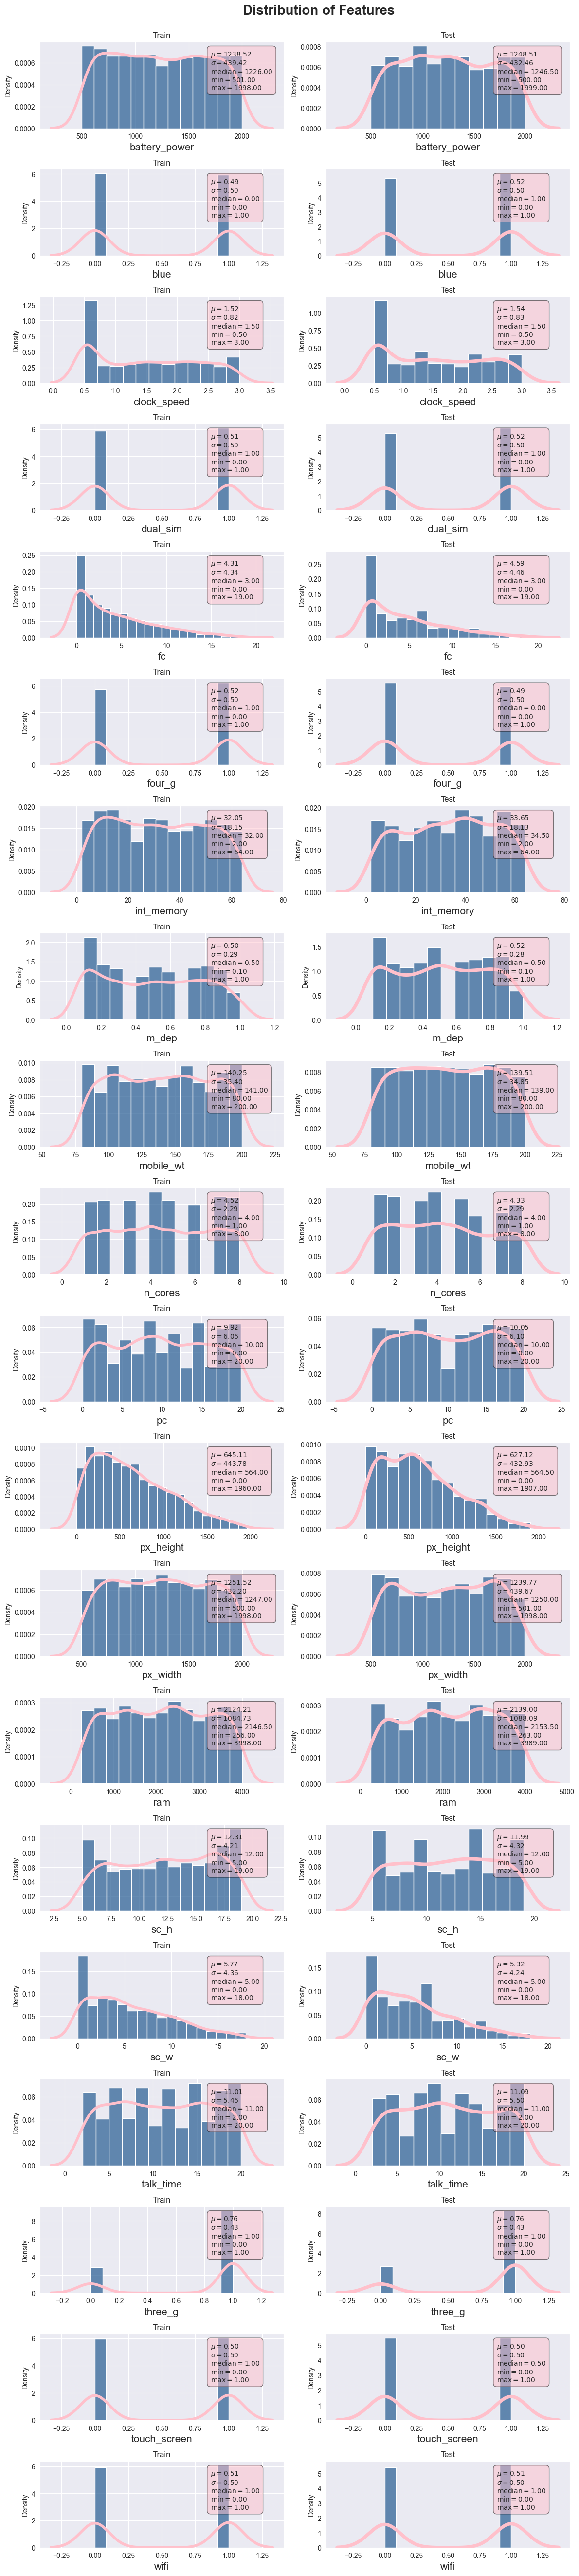

In [46]:
sns.set_style('darkgrid')
color = 'blue'

plt.figure(figsize=(12, 55 ))
i =0
for index, col in enumerate(list(train_without_target.columns.values)):
    i += 1 ;
    plt.subplot(21, 2, index + i)
    ax = sns.histplot(x=col, data=train_without_target, color="#326598", stat="density", common_norm = False)
    sns.kdeplot(x=col, data= train_without_target, color="pink", linewidth=4)
    plt.xlabel(col, size=15)
    plt.title('Train')
    #set text on axes
    textstr_train = '\n'.join((
    r'$\mu=%.2f$' %train_without_target[col].mean(),
    r'$\sigma=%.2f$' %train_without_target[col].std(),
    r'$\mathrm{median}=%0.2f$' %np.median(train_without_target[col]),
    r'$\mathrm{min}=%.2f$' %train_without_target[col].min(),
    r'$\mathrm{max}=%.2f$' %train_without_target[col].max()
    ))
    ax.text(0.7, 0.90, textstr_train, fontsize=10, transform=ax.transAxes, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='pink', 
    edgecolor='black', pad=0.5, alpha=0.5))
    plt.subplot(21, 2, index +(i + 1))
    ax = sns.histplot(x=col, data=test, color="#326598", stat="density", common_norm = False)
    sns.kdeplot(x=col, data=test, color='pink', linewidth=5)
    plt.xlabel(col, size=15)
    plt.title('Test')
    textstr_test = '\n'.join((
    r'$\mu=%.2f$' %test[col].mean(),
    r'$\sigma=%.2f$' %test[col].std(),
    r'$\mathrm{median}=%0.2f$' %np.median(test[col]),
    r'$\mathrm{min}=%.2f$' %test[col].min(),
    r'$\mathrm{max}=%.2f$' %test[col].max()
    ))
    ax.text(0.7, 0.90, textstr_test, fontsize=10, transform=ax.transAxes, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='pink', edgecolor='black', pad = 0.5, alpha = 0.5))
    plt.grid()
    plt.suptitle("Distribution of Features", y=1, x=0.55, size=20, fontweight='bold')
    plt.tight_layout()
plt.show()  

Setiap fitur distribusi diperiksa pada kedua dataset tersebut dan didapat kesimpulannya sebagai berikut:
1. Distribusi fitur pada kedua dataset mirip walaupun terdapat perbedaan
2. Pembagian variabel continue dan categorical dapat dilakukan dengan mudah

In [55]:
num_columns =  ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']
cat_column = ['blue', 'dual_sim', 'four_g', 'n_cores', 'three_g', 'touch_screen', 'wifi']

3.1 EDA untuk Categorical Features

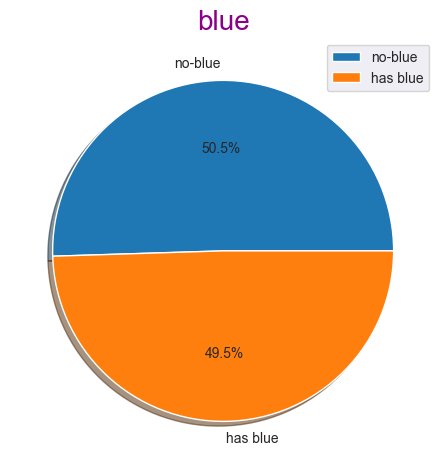

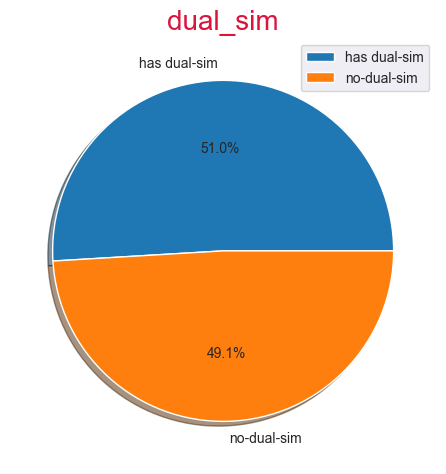

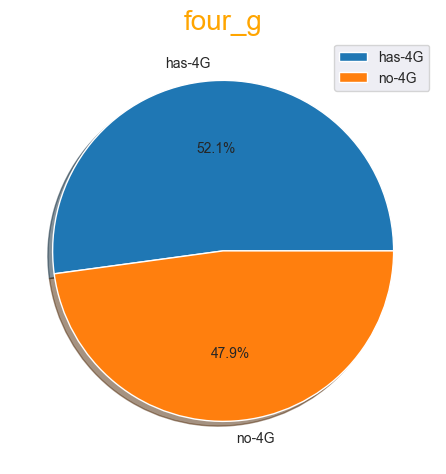

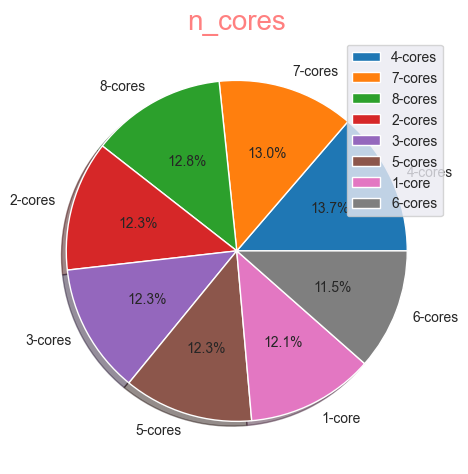

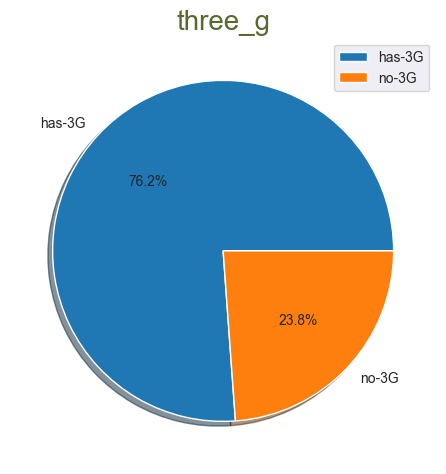

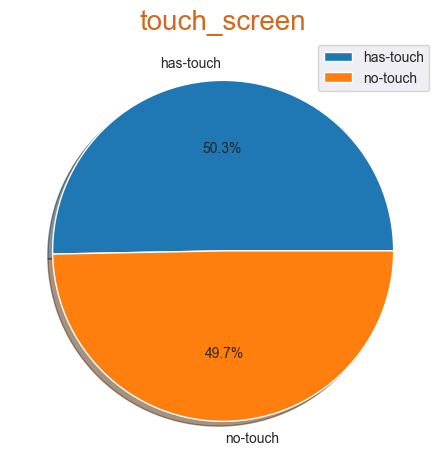

In [56]:
colors_cat=['#8B008B','#DC143C','#FFA500','#ff8080','#556B2F','#D2691E','#DAA520']
new_train=train.replace(to_replace={'blue':[0,1],'dual_sim':[0,1],'four_g':[0,1],
                      'n_cores':[1,2,3,4,5,6,7,8],'three_g':[0,1],'touch_screen':[0,1],'wifi':[0,1]},
           value={'blue':['no-blue','has blue'],
                  'dual_sim':['no-dual-sim','has dual-sim'],
                 'four_g':['no-4G','has-4G'],
                 'n_cores':['1-core','2-cores','3-cores','4-cores','5-cores','6-cores','7-cores','8-cores'],
                 'three_g':['no-3G','has-3G'],
                 'touch_screen':['no-touch','has-touch'],
                 'wifi':['no-wifi','has-wifi']})
for i,c in enumerate(cat_column):
    plt.figure(figsize =(5.5, 6.5))
    plt.pie(new_train[c].value_counts() ,labels=list(new_train[c].value_counts().index),shadow = True,autopct='%1.1f%%')
    plt.legend()
    plt.title(c,color=colors_cat[i],fontsize=20)

Fitur-fitur yang ada dalam data training dan testing
1. Perbandingan jumlah ponsel yang menggunakan bluetooh dan tidak, jumlah nya tidak terlalu jauh
2. Begitu juga dengan ponsel yang dual sim dan single sim perbandingan jumlah nya tidak terlalu jauh
3. Jumlah ponsel yang 4G sedikit lebih banyak daripada ponsel yang tidak 4G
4. Jumlah ponsel dengan jenis jumlah core yang berbeda memiliki distribusi yang hampir merata
5. Jumlah ponsel layar sentuh dan yang memiliki akses WIFI memiliki distribsui yang sama seperti distribusi jumlah core ponsel
6. Jumlah ponsel yang 3G jauh lebih banyak dibandingkan ponsel yang tidak 3G

3.2 EDA untuk numerical Features

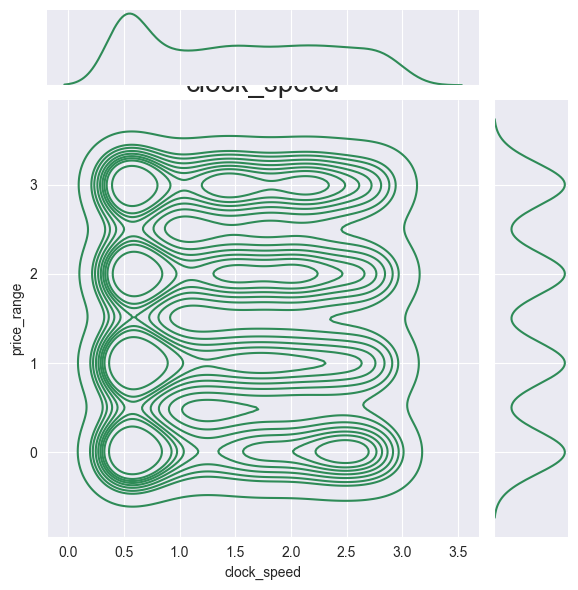

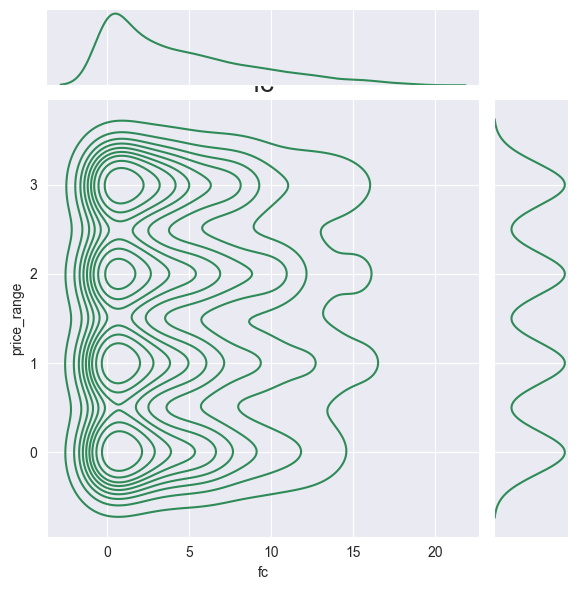

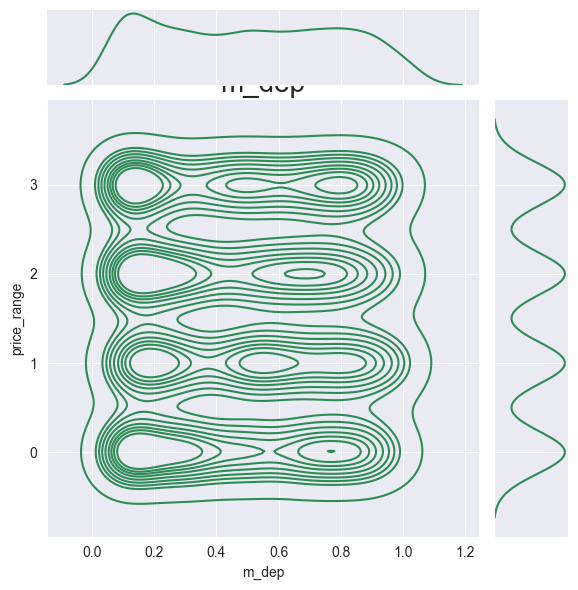

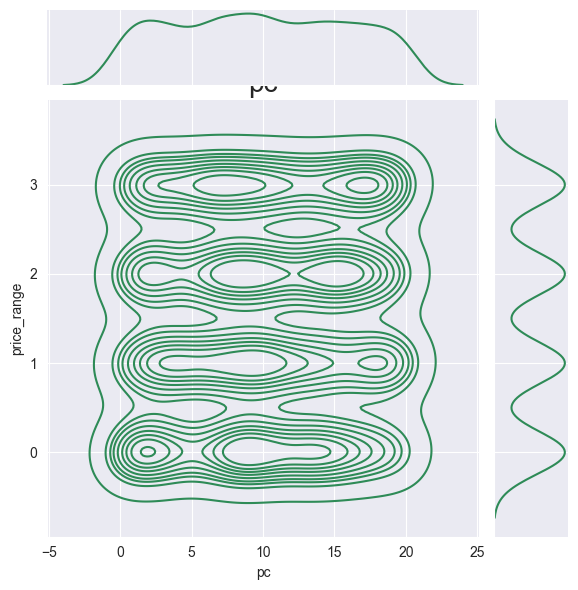

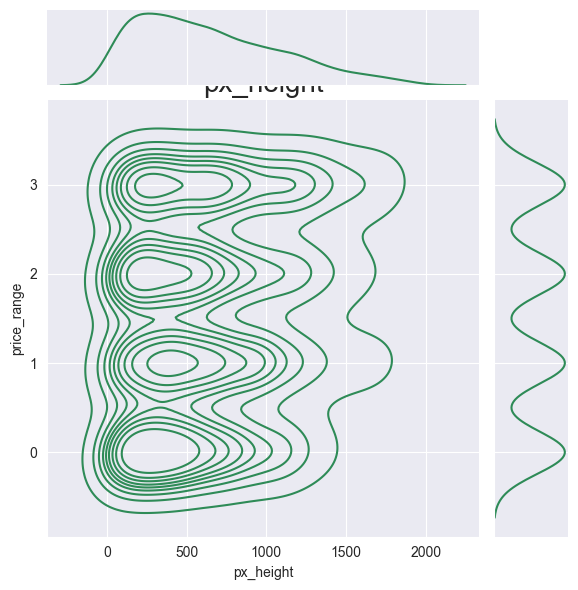

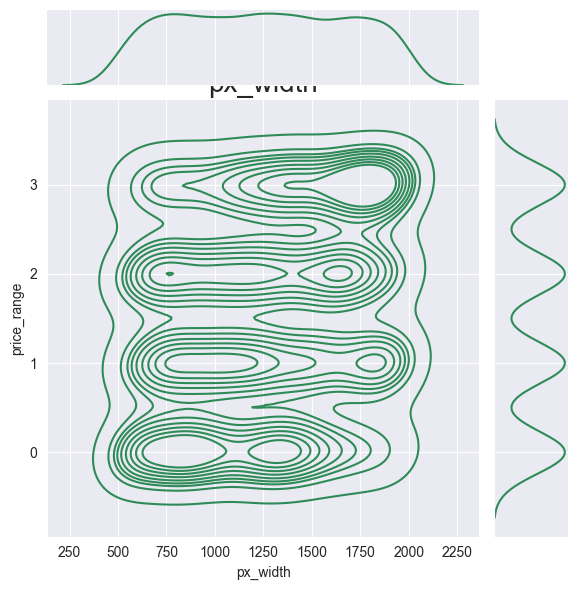

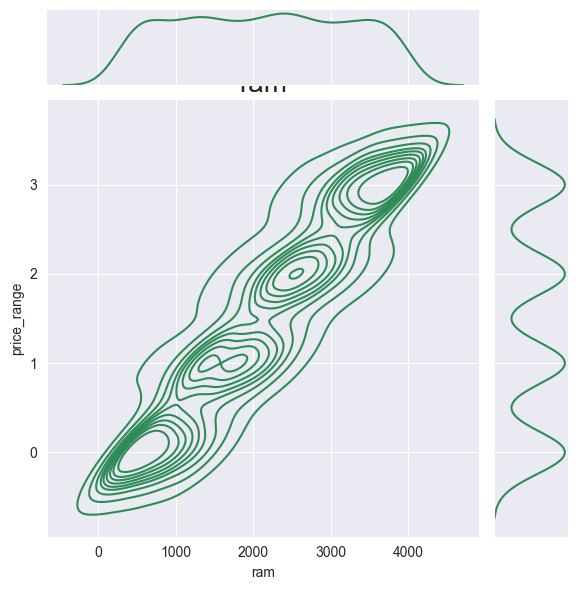

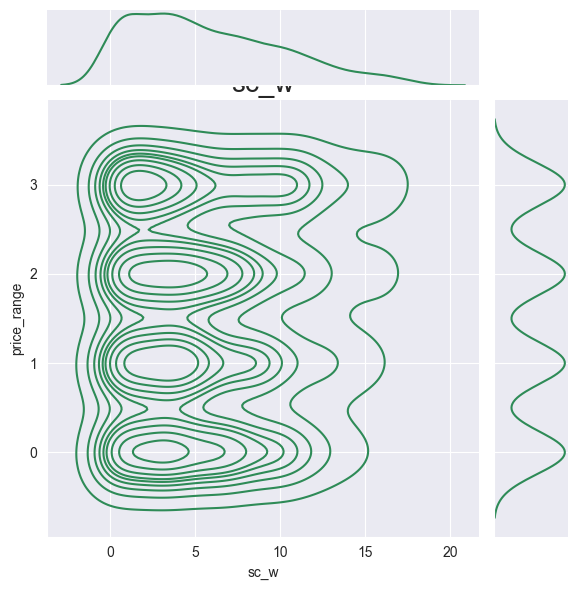

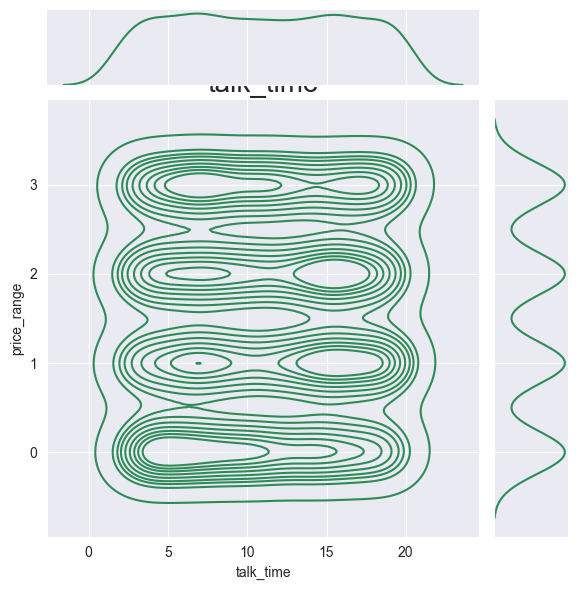

In [57]:
for i, c in enumerate (num_columns):
    sns.jointplot(x=c, y='price_range', data=train, kind='kde', palette='dict', color='seagreen')
    plt.xlabel(c)
    plt.ylabel('price_range')
    plt.title(c, fontsize=20)

**ANALYSIS** :

1. Battrey_power: Kosentrasi berdasarkan, kelas nol yaitu daya batrei HP dibawah 1500 mAh dan ponsel yang lebih mahal daya batreinya diatas 1500 mAh.
2. clock_speed: terdapat kosentrasi untuk dibawah 1,0 GHz itu diperuntukkan semua grup, Namun dari keempat kategori tersebut, bipolar juga dapat dilihat.
3. fc: bipolar yang disebutkan juga tidak dapat dilihat dari case kamera depan
4. int_memory: pada ponsel dengan kelas 3 yaitu yang paling mahal, terdapat kosentrasi untuk value diatas 35 GB untuk memori internal. Disisi lain juga ponsel yang lebih murah memiliki memori internal yang lebih rendah.
5. m_dep: biasanya, ponsel yang lebih murah memiliki kedalaman yang lebih sedikit daripada ponsel yang lebih mahal
6. mobile_wt: ponsel yang mahal biasanya lebih ringan daripada yang murah, namun ponsel kelas 2 memiliki bobot lebih dari 120gr.
7. pc: ponsel kelas 1 memiliki kamera belakang kurang dari 15 megapixel, tetapi ponsel yang kelas 0 memiliki megapixel yang lebih tinggi.(tetapi pernyataan ini pada kenyataan nya kurang relate)
8. px_height: pada semua kelas, jumlah ponsel yang memiliki tinggi layar lcd nya kurang 600 pixel lebih banyak
9. px_weidth: pada ponsel yang lebih mahal, jumlah pixel pada lebar ponsel lebih dari 1000 pixel, namun kelas 1 & 2 kurang dari itu.
10. ram: secara umum, ponsel mahal memiliki ram yang lebih tinggi
11. sc_h: tinggi sebagian ponsel pada kelas 3 lebih dari 12 cm, namun tidak terlalu mencolok pada kelas lain
12. sc_w: lebar ponsel yang mahal lebih kecil daripada ponsel murah
13. 



## **Tahapan Kedua: Preprocessing Data**


- Pada tahap ini, data harus dicek pada setiap aspek untuk memutuskan apakah ada noise data atau outlier di kolom

### 1. Missing Values & Duplicates

In [58]:
train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [59]:
test.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

Tidak ada nilai yang hilang dari kedua dataset tersebut

In [60]:
train.drop_duplicates(inplace=True)
train.shape

(2000, 21)

In [61]:
test.drop_duplicates(inplace=True)
test.shape

(1000, 20)

Tidak ada nilai yang duplikat dari kedua dataset tersebut

### 2. Noise & Outliers

**Noise Detection**

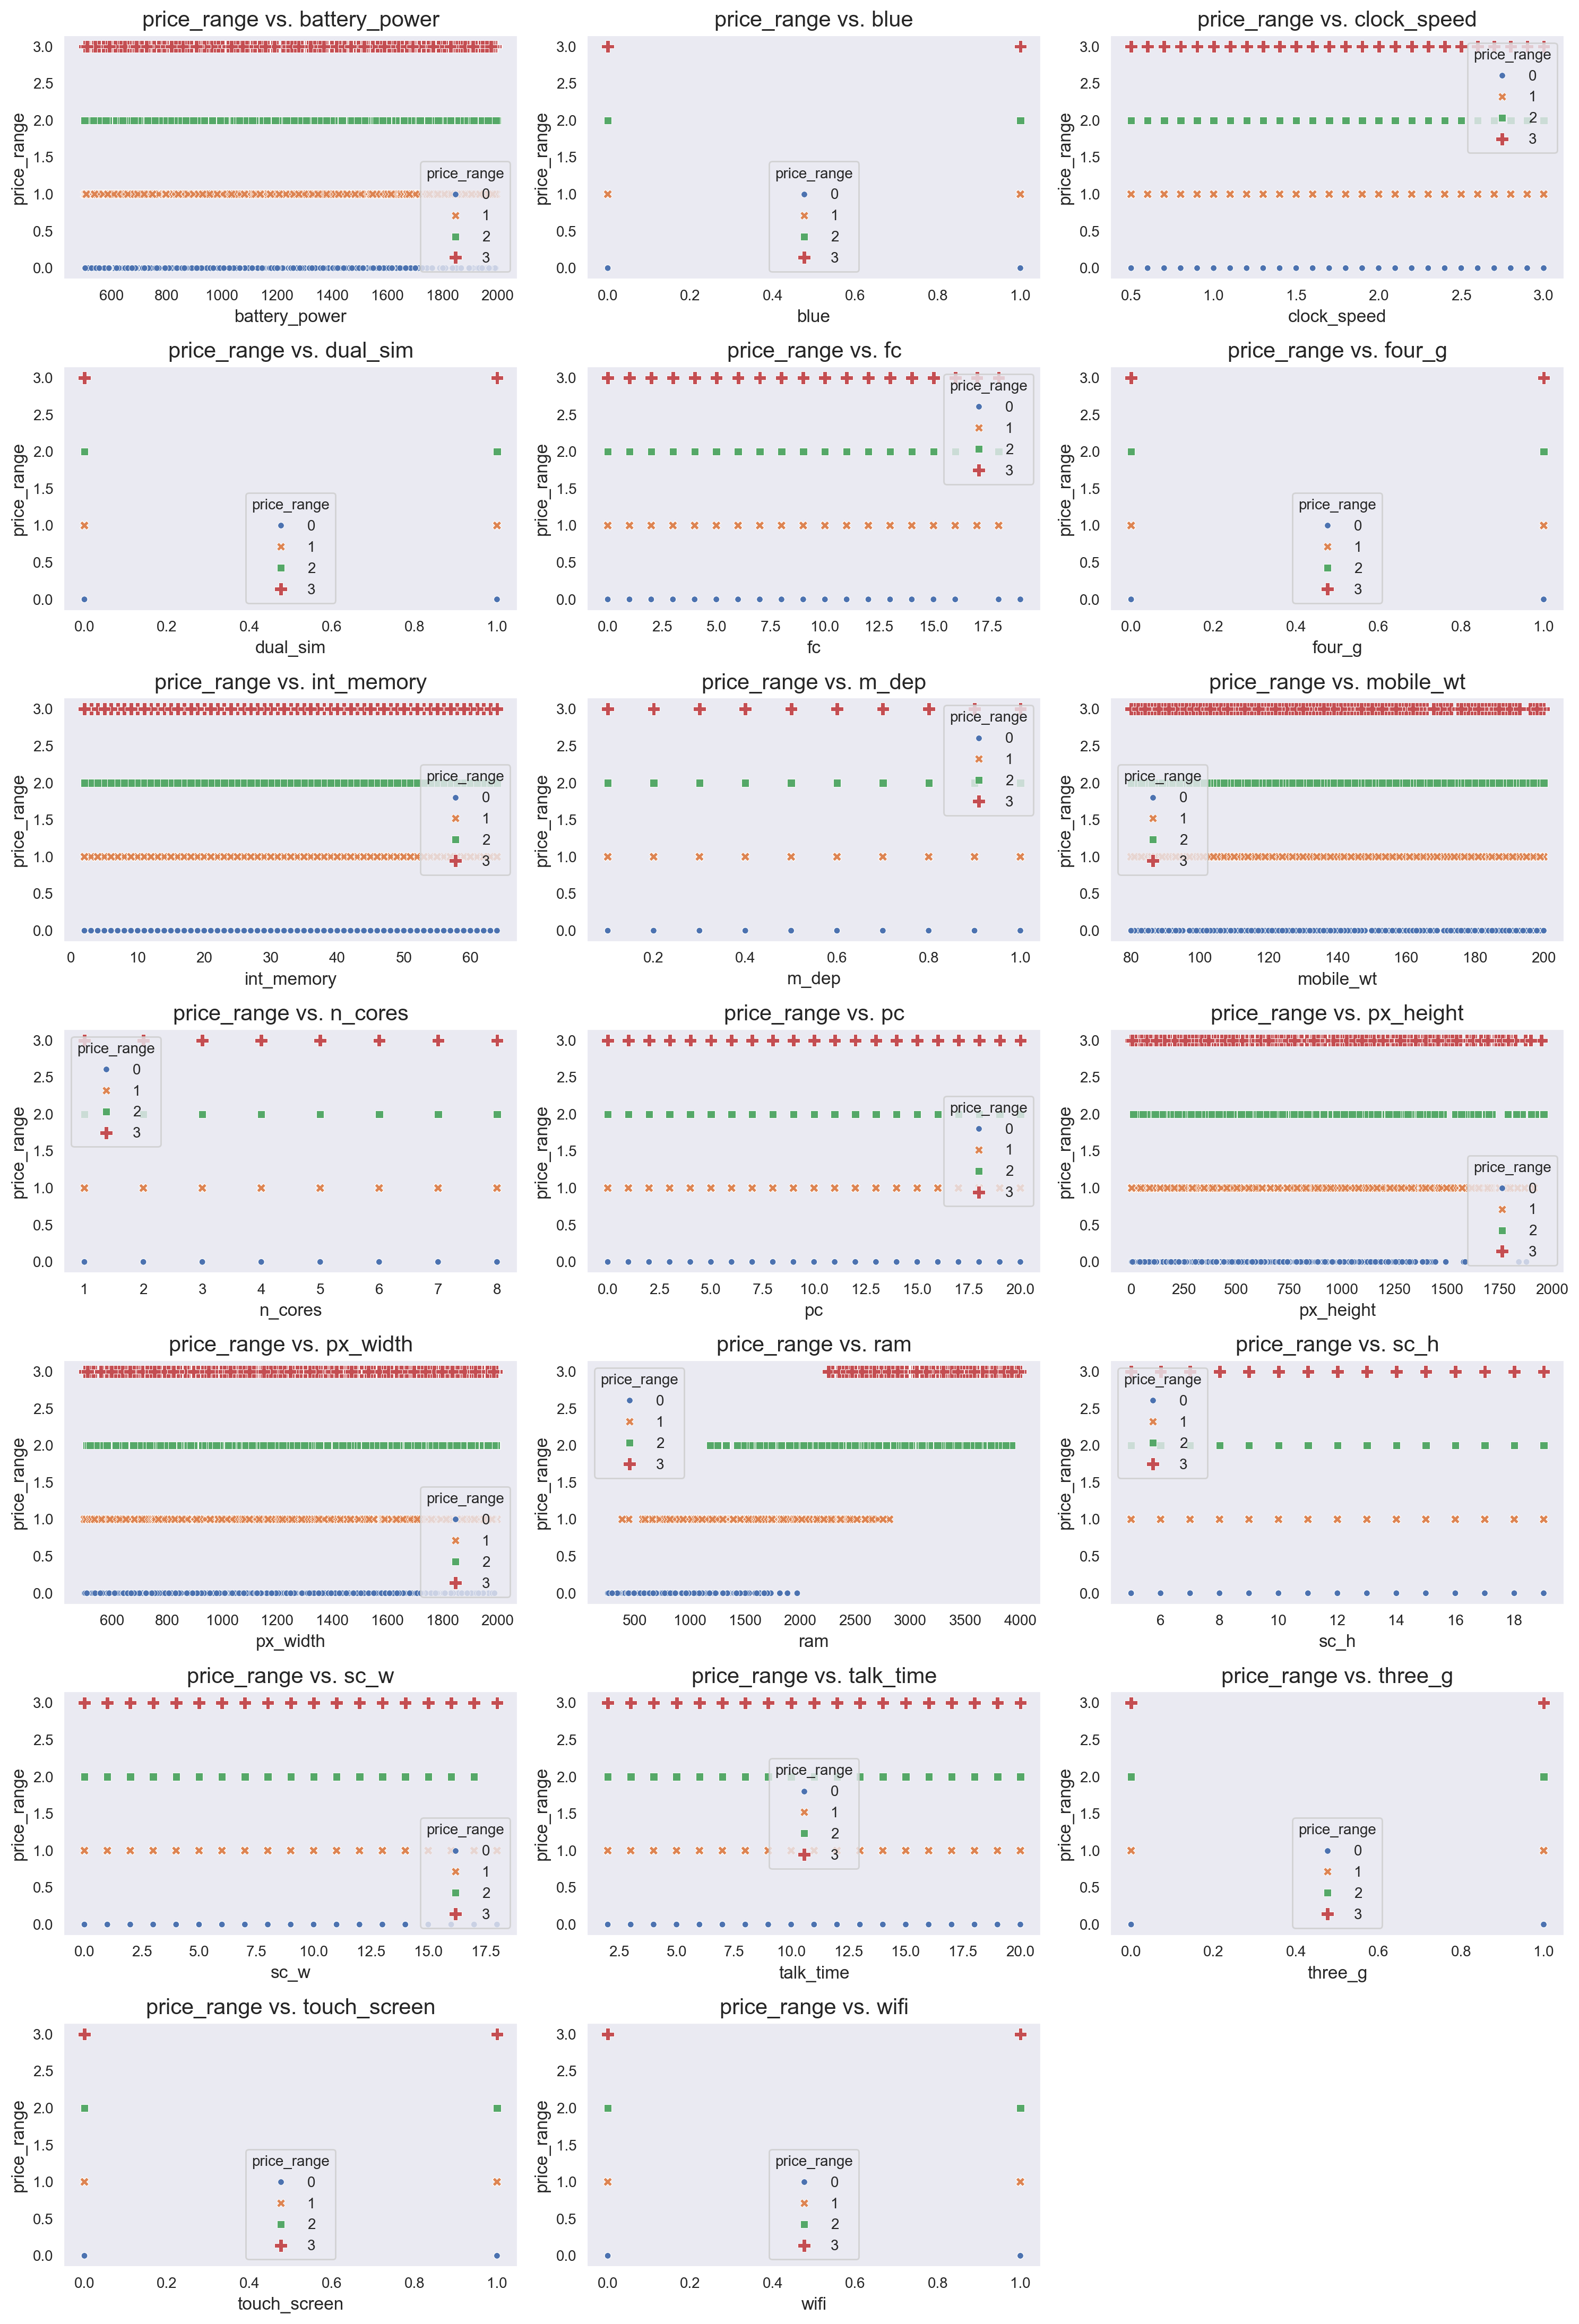

In [64]:
target = 'price_range'
features = train.columns.drop(target)
colors = ['#a9f943', '#ed67cd', '#23bf00','#5687da']
CustomPalette = sns.set_palette(sns.color_palette(colors))
fig, ax= plt.subplots(nrows=7, ncols=3, figsize=(15, 22), dpi=200)

for i in range (len(features)):
    x=i//3
    y=i%3
    sns.scatterplot(data=train, x=features[i], y=target, hue=target, ax=ax[x,y], style=target,palette= "deep", size=target)
    ax[x,y].set_title('{} vs. {}'.format(target, features[i]), size=15)
    ax[x,y].set_xlabel(features[i], size=12)
    ax[x,y].set_ylabel(target, size=12)
    ax[x,y].grid()

ax[6,2].axis('off')

plt.tight_layout()
plt.show()

**Noise:**
Deskripsi Fitur-fitur:

1. px_width & px_heigth
   - Pada case ini, ukuran dimensi fisik mengacu pada dimensi fisik tampilan ponsel. Bisa dalam inci atau sentimeter.Disisi lain pada resolusi layar, mengacu pada jumlah pixel yang ditampilkan oleh layar yang diukur pixel per-inci atau pixel per-sentimeter.

   - untuk menghitung pixel per-inci pada perangkat tertentu, diperlukan untuk mengetahui resolusi layar perangkat(dalam pixel) dan ukuran fisik perangkat(dalam inci). setelah mendapatkan nya, dapat dihitung dengan rumus berikut:

   - PPI = (resolution in pixels) / (screen size in inches)
  
   Menurut Dokumen Definisi Kompatibilitas terbaru, definisi konfigurasi layar mengharuskan:

   - Layar harus berukuran minimal 2,5 inci dalam ukuran diagonal fisik
   - Kepadatan harus minimal 100 dpi
   - Rasio aspek harus antara 1,333 (4:3) dan 1,779 (16:9)
   - Teknologi tampilan yang digunakan terdiri dari piksel persegi
   - Secara praktis, resolusi layar terendah yang digunakan saat ini adalah QVGA (240x320). Ada beberapa ponsel yang menggunakan resolusi ini termasuk HTC Tattoo dan Wildfire. Perangkat terkecil yang saya ketahui adalah QVGA 2,55".
   - px_h:320
   - px_w: 240
  
(Biasanya dikutip sebagai lebar × tinggi, dengan satuan dalam piksel: misalnya, 1024 × 768 berarti lebarnya 1024 piksel dan tingginya 768 piksel)

Contoh, kita menggunakan HP terkecil di dunia:
- Dimensions - 75 x 46.5 x 11mm Memory - removable microSDHC support (2GB, max. 32GB) Screen - 2.2” resistive touch screen 3G network - HSDPA 3.6Mbps 900/1900/2100 MHz 240 x 320 pixels resolution (QVGA).

Dapat dilihat bahwa minimal nilai px_height dan px_width adalah 320 x 240 pixel.




In [65]:
print('train------------')
print('px_height :', len(train[(train['px_height']<320)]))
print('px_width :', len(train[(train['px_width']<240)]))
print('test------------')
print('px_height :', len(test[(test['px_height']<320)]))
print('px_width :', len(test[(test['px_width']<240)]))

train------------
px_height : 568
px_width : 0
test------------
px_height : 294
px_width : 0


Kita akan mengganti nilai minimal px_height menjadi 320

In [67]:
train['px_height'].replace(train['px_height'][(train['px_height']<320)].values,320, inplace=True) 
test['px_height'].replace(test['px_height'][(test['px_height']<320)].values,320, inplace=True) 

2. sc-h dan sc-w

- ponsel terkecil didunia memiliki diagonal 2,2 inci (5,588 cm) jadi, apabila kita mendapatkan train ['sc_h'].min(), maka kita akan mendapatkan nilai min untuk sc_w sekitar 2,5 cm dan jika kita tidak menganggap nilai ini untuk sc_h yaitu bukan nilai terkecil didunia, maka kita dapat menggunakan 2,5 untuk sc_w sebagai nilai minimun

In [68]:
print('train--------------------')
print('px_height: ',len(train[(train['sc_w']<2.5)]))
print('px_width: ',len(train[(train['sc_h']<5)]))
print('test--------------------')
print('px_height: ',len(test[(test['sc_w']<2.5)]))
print('px_width: ',len(test[(test['sc_h']<5)]))

train--------------------
px_height:  546
px_width:  0
test--------------------
px_height:  318
px_width:  0


In [69]:
train['sc_w'].replace(train['sc_w'][(train['sc_w']<2.5)].values,2.5,inplace=True)
test['sc_w'].replace(test['sc_w'][(test['sc_w']<2.5)].values,2.5,inplace=True)

Setelah dilakukan pengecekan terhada 4 kolom tadi, terlihat sepertinya tidak ada masalah pada kolom' lainnya. Dan kita bisa melanjutkan ke proses pemeriksaan outlier

In [70]:
#train dataset
outliers_indexes = []
target = 'price_range'

for col in train.select_dtypes(include='object').columns:
    for cat in train[col].unique():
        df_1 = train[train[col] == cat]
        q1 = df_1[target].quantile(0.25)
        q3 = df_1[target].quantile(0.75)
        iqr = q3-q1
        maximum = q3 + (1.5 * iqr)
        minimum = q1 - (1.5 * iqr)
        outlier_samples = df_1[(df_1[target] < minimum) | (df_1[target] > maximum)]
        outliers_indexes.extend(outlier_samples.index.tolist())

In [71]:
for col in train.select_dtypes(exclude='object').columns:
    q1 = train[col].quantile(0.25)
    q3 = train[col].quantile(0.75)
    iqr = q3-q1
    maximum = q3 + (1.5 * iqr)
    minimum = q1 - (1.5 * iqr)
    outlier_samples = train[(train[col] < minimum) | (train[col] > maximum)]
    outliers_indexes.extend(outlier_samples.index.tolist())

In [72]:
outliers_indexes = list(set(outliers_indexes))
print('{} outlier terindentifikasi, yang indeksnya adalah:\n\n{}'.format(len(outliers_indexes), outliers_indexes))

498 outlier terindentifikasi, yang indeksnya adalah:

[0, 10, 19, 22, 30, 45, 49, 51, 54, 58, 67, 74, 77, 79, 82, 85, 86, 94, 95, 98, 106, 111, 118, 120, 122, 125, 134, 135, 139, 146, 148, 151, 154, 158, 159, 169, 176, 179, 182, 207, 212, 219, 222, 224, 226, 227, 229, 230, 231, 246, 250, 251, 254, 260, 263, 269, 279, 286, 289, 290, 291, 296, 298, 300, 301, 303, 305, 307, 308, 310, 311, 314, 322, 325, 326, 327, 328, 329, 330, 334, 335, 343, 344, 349, 351, 352, 356, 360, 362, 364, 370, 372, 373, 378, 380, 387, 390, 391, 392, 406, 412, 413, 416, 423, 424, 431, 439, 440, 442, 443, 445, 449, 456, 463, 469, 470, 471, 474, 477, 478, 482, 488, 493, 496, 500, 505, 507, 508, 511, 515, 518, 523, 537, 539, 547, 550, 555, 558, 560, 561, 563, 564, 565, 567, 568, 577, 584, 588, 589, 590, 592, 595, 602, 610, 611, 614, 615, 616, 627, 636, 640, 643, 645, 649, 650, 666, 672, 673, 685, 687, 691, 692, 694, 698, 701, 704, 708, 715, 722, 723, 724, 725, 728, 731, 735, 736, 740, 741, 749, 754, 755, 757, 766, 7

plot outlier untuk variable continue dan categorical

In [78]:
sns.set_style('darkgrid')
colors = ['#a9f943', '#ed67cd', '#23bf00','#5687da','#af28aa','#8236ba','#0ff5a6','#83912c']
CustomPalette = sns.set_palette(sns.color_palette(colors))

OrderedCols = np.concatenate([num_columns,cat_column])

fig, ax = plt.subplots(5, 4, figsize=(15,20),dpi=100)

for i,col in enumerate(OrderedCols):
    x = i//4
    y = i%4
    if i<13:
        sns.boxplot(data=train, y=col, ax=ax[x,y])
        ax[x,y].yaxis.label.set_size(15)
    else:
        sns.boxplot(data=train, x=col, y='price_range', ax=ax[x,y])
        ax[x,y].xaxis.label.set_size(15)
        ax[x,y].yaxis.label.set_size(15)

plt.tight_layout()    
plt.show()


- Berdasarkan definisi fungsinya, kita harus mengecek outlier dan setelah mencentang diagram plot kotak, terlihat bahwa jumlah outlier masih tinggi. Oleh karna itu, apabila kita ingin menghilangkan nya maka generalisasi model akan dikurangi. jadi model akan dibangun dan di evaluasis dengan outlier ini.jika hasil outlier masih buruk maka proses keputusan tentang outlier akan ditinjau ulang

### 3. Tahapan Ketiga: Correlation

Text(0.5, 1.0, 'Triangle')

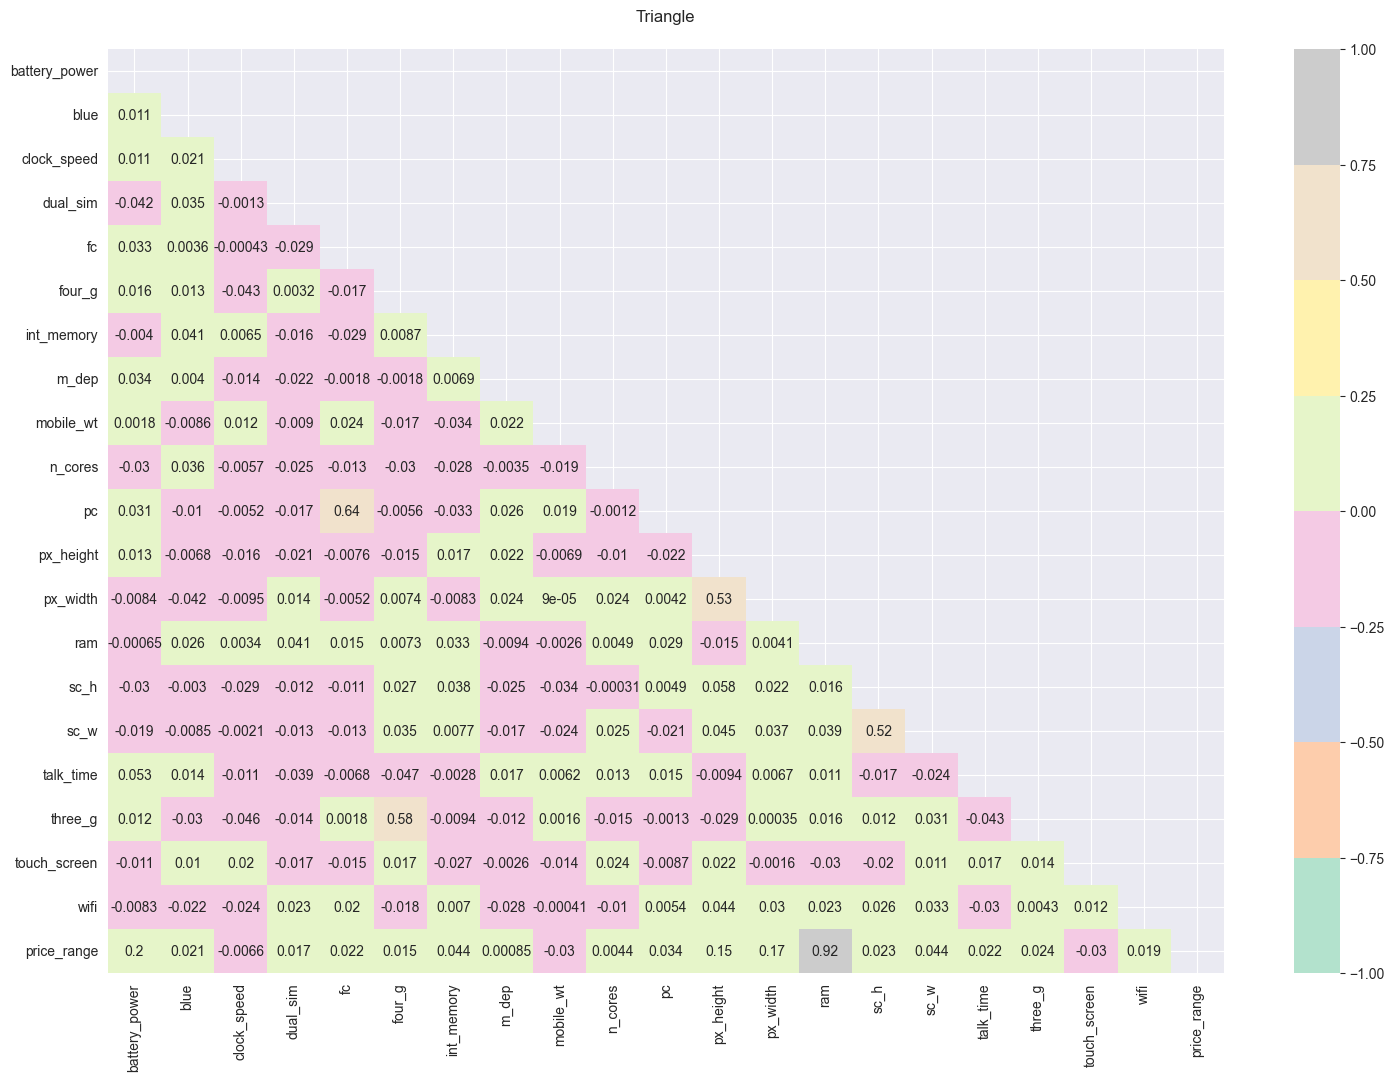

In [81]:
fig, ax = plt.subplots(1,1, figsize=(18,12))
mask=np.triu(np.ones_like(train.corr()))
heatmap=sns.heatmap(train.corr(), vmin=-1, vmax=1, mask=mask,cmap='Pastel2', annot=True)
heatmap.set_title('Triangle', fontdict={'fontsize':12}, pad=20)

Dari diagram diatas dapat dilihat bahwa:
1. Adanya korelasi yang tinggi antara ram dan kolom target, yang mana kolom ini akan berdampak besar pada permodelan nanti.
2. Korelasi yang sangat tinggi juga ada antara kolom Pc dan Fc, namun tidak harus menghilangkan salah satu nya. Karena seperti yang kita tau apabila ada korelasi antara kedua kolom independen tinggi , maka salah satunya harus dihilangkan untuk permodelan karna dapat menyebabkan multikolinearitas.
3. kasus seperti no.2 juga ada pada kolom px_widht dan px_height.
Namun setelah membuat model, seperti yang telah dibahas tentang outlier. apabila hasil yang diinginkan tidak tercapai, maka perlu tinjauan ulang tentang elemen tersebut.

## Tahapan Ketiga: Training Model & Evaluating The Result


Pada tahap ini, kita akan membangun beberapa jenis model yang sesuai dengan dataset dan di akhir akan dilakukan proses evaluasi.
 - Pada bagian ini, kita akan menggunakan 3 model yaitu, Decision tree model (DT), Random Forest(RF), dan SVM.
 - Penyajian konstruksi model dibagi menjadi 2:
      - Pertama, membuat model sederhana tanpa menggunakan hyperparameter apapun dan mengungkapkan hasilnya.
      - Kedua, Pendefinisian fungsi model secara terpisah dan menyatakan hasilnya dengan mengatur beberapa rangkaian parameter yang akan digunakan

### Langkah pertama: Membuat model sederhana

In [95]:
Y=train['price_range']
X=train.drop('price_range',axis=1)

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

In [97]:
def evaluate_model(models, X_train, X_test, y_train, y_test):
    compare_list = []
    for index,clf in models :
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        compare_list.append((pd.Series({"Precision" : precision_score(y_test, y_pred,average='macro'),
                           "Recall" : recall_score(y_test, y_pred,average='macro'),
                           "F1" : f1_score(y_test, y_pred,average='macro'),
                           "Accuracy" : accuracy_score(y_test, y_pred),
                           "Train_Score" : clf.score((X_train),y_train),
                           "Test_Score" : clf.score((X_test), y_test)}, name = index)))
    compare_list = pd.DataFrame(compare_list).T
    return compare_list

In [98]:
clf_DT=DecisionTreeClassifier(random_state=0)
clf_RF=RandomForestClassifier(random_state=0)
clf_SVC=SVC(random_state=0)
models = [('DTs',clf_DT), ('RF',clf_RF),('SVC',clf_SVC)]

In [99]:
def highlight(s):
    is_max = s == s.max()
    return ['background-color: green' if v else '' for v in is_max]

In [100]:
result_1 = evaluate_model(models, X_train, X_test, y_train, y_test)
result_1.style.apply(highlight,axis=1)

Berdasarkan hasil yang diperoleh dari permodelan diatas, dapat dilihat bahwa SVM mendapati hasil yang terbaik. Maka dari itu SVM akan digunakaan sebagai model utama pada proses prediksi nanti nya.


Accuracy (SVM) : 0.95

### Langkah Kedua: Menggunakan hyperparamater untuk Model yang digunakan

1. Decision Tree (DTs)

In [106]:
def DT(X,Y,m_depth):
    compare_list_2 = []
    X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=0)
    for i in m_depth:
        clf=DecisionTreeClassifier(max_depth=i, random_state=0)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        compare_list_2.append((pd.Series({"Precision" : precision_score(y_test, y_pred,average='macro'),
                           "Recall" : recall_score(y_test, y_pred,average='macro'),
                           "F1" : f1_score(y_test, y_pred,average='macro'),
                           "Accuracy" : accuracy_score(y_test, y_pred),
                           "Train_Score" : clf.score((X_train),y_train),
                           "Test_Score" : clf.score((X_test), y_test)}, name = i)))
    compare_list_2 = pd.DataFrame(compare_list_2).T
    return compare_list_2

In [105]:
compare_2 = DT(X,Y,np.arange(1,30))
print('Accuracy of DT :', compare_2.loc['Accuracy',].max())
print(compare_2.idxmax(axis=1))

Accuracy of DT : 0.85
Precision      13
Recall         13
F1             13
Accuracy       13
Train_Score    14
Test_Score     13
dtype: int32


2. Random Forrest (RF)

In [107]:
def RF(X,Y,m_depth):
    compare_list_3 = []
    X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=0)
    for i in m_depth:
        clf=RandomForestClassifier(max_depth=i,random_state=0)
        clf.fit(X_train,y_train)
        y_pred=clf.predict(X_test)
        compare_list_3.append((pd.Series({"Precision" : precision_score(y_test, y_pred,average='macro'),
                           "Recall" : recall_score(y_test, y_pred,average='macro'),
                           "F1" : f1_score(y_test, y_pred,average='macro'),
                           "Accuracy" : accuracy_score(y_test, y_pred),
                           "Train_Score" : clf.score((X_train),y_train),
                           "Test_Score" : clf.score((X_test), y_test)}, name = i)))
    compare_list_3 = pd.DataFrame(compare_list_3).T
    return compare_list_3

In [108]:
compare_3 = RF( X, Y, np.arange(1,30))
print('Accuracy of RF:',compare_3.loc['Accuracy',].max())
print(compare_3.idxmax(axis=1))

Accuracy of RF: 0.88
Precision      15
Recall         15
F1             15
Accuracy       15
Train_Score    10
Test_Score     15
dtype: int32


3. SVM

In [109]:
def SVM(X,Y):
    compare_list_4 = []
    X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=0)
    
    for i in range(1,150):
        for j in [2,3,4,5,6,7,8,9,10,11,12,13,14,15]:
            clf=SVC(C=i,random_state=0,kernel='poly',degree=j)
            clf.fit(X_train,y_train)
            y_pred=clf.predict(X_test)
            compare_list_4.append((pd.Series({"Precision" : precision_score(y_test, y_pred,average='macro'),
                           "Recall" : recall_score(y_test, y_pred,average='macro'),
                           "F1" : f1_score(y_test, y_pred,average='macro'),
                           "Accuracy" : accuracy_score(y_test, y_pred),
                           "Train_Score" : clf.score((X_train),y_train),
                           "Test_Score" : clf.score((X_test), y_test)}, name = (i,j))))
    compare_list_4 = pd.DataFrame(compare_list_4).T
    return compare_list_4

In [110]:
compare_4 = SVM(X,Y)

In [111]:
compare_4.idxmax(axis=1) # untuk mendapatkan indeks maximum pada setiap kolom

Precision        (35, 2)
Recall           (35, 2)
F1               (35, 2)
Accuracy          (5, 4)
Train_Score    (141, 10)
Test_Score        (5, 4)
dtype: object

In [112]:
result_2=pd.DataFrame(index=["Precision","Recall","F1", "Accuracy",'Train_Score','Test_Score'],
            columns=['DT','RF','SVM'],
            data=[[compare_2.loc['Precision',].max(),compare_3.loc['Precision',].max(),compare_4.loc['Precision',].max()],
                  [compare_2.loc['Recall',].max(),compare_3.loc['Recall',].max(),compare_4.loc['Recall',].max()],
                  [compare_2.loc['F1',].max(),compare_3.loc['F1',].max(),compare_4.loc['F1',].max()],
                  [compare_2.loc['Accuracy',].max(),compare_3.loc['Accuracy',].max(),compare_4.loc['Accuracy',].max()],
                 [compare_2.loc['Train_Score',].max(),compare_3.loc['Train_Score',].max(),compare_4.loc['Train_Score',].max()],
                  [compare_2.loc['Test_Score',].max(),compare_3.loc['Test_Score',].max(),compare_4.loc['Test_Score',].max()]])
result_2.style.apply(highlight,axis=1)

**Accuracy (SVM) : 0.988**

## Tahapan Keempat: Pengujian

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=0)
clf2 = SVC(C=35, random_state=0, kernel='poly', degree=2)
clf2.fit(X_train,y_train)
y_pred2 = clf2.predict(X_test)
accuracy_score(y_test, y_pred2)

0.98

In [114]:
clf3 = SVC()

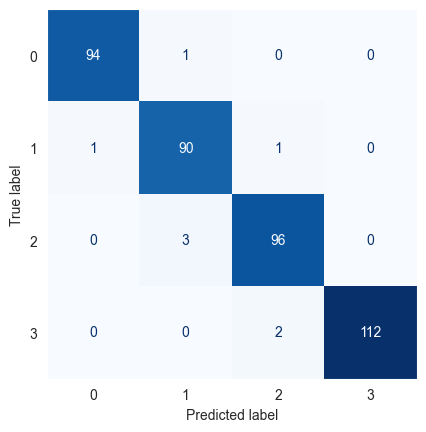

In [115]:
ConfusionMatrixDisplay.from_estimator(clf2, X_test, y_test, colorbar=False, cmap='Blues')
plt.grid(False)

In [116]:
test['price_range']=clf2.predict(test);test

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0             1043     1          1.8         1  14       0           5   
1              841     1          0.5         1   4       1          61   
2             1807     1          2.8         0   1       0          27   
3             1546     0          0.5         1  18       1          25   
4             1434     0          1.4         0  11       1          49   
..             ...   ...          ...       ...  ..     ...         ...   
995           1700     1          1.9         0   0       1          54   
996            609     0          1.8         1   0       0          13   
997           1185     0          1.4         0   1       1           8   
998           1533     1          0.5         1   0       0          50   
999           1270     1          0.5         0   4       1          35   

     m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0      0.1        193        3  ...        320      1412  3476    12   7.0   
1      0.8        191        5  ...        746       857  3895     6   2.5   
2      0.9        186        3  ...       1270      1366  2396    17  10.0   
3      0.5         96        8  ...        320      1752  3893    10   2.5   
4      0.5        108        6  ...        749       810  1773    15   8.0   
..     ...        ...      ...  ...        ...       ...   ...   ...   ...   
995    0.5        170        7  ...        644       913  2121    14   8.0   
996    0.9        186        4  ...       1152      1632  1933     8   2.5   
997    0.5         80        1  ...        477       825  1223     5   2.5   
998    0.4        171        2  ...        320       832  2509    15  11.0   
999    0.1        140        6  ...        457       608  2828     9   2.5   

     talk_time  three_g  touch_screen  wifi  price_range  
0            2        0             1     0            3  
1            7        1             0     0            3  
2           10        0             1     1            2  
3            7        1             1     0            3  
4            7        1             0     1            1  
..         ...      ...           ...   ...          ...  
995         15        1             1     0            2  
996         19        0             1     1            1  
997         14        1             0     0            0  
998          6        0             1     0            2  
999          3        1             0     1            2  

[1000 rows x 21 columns]

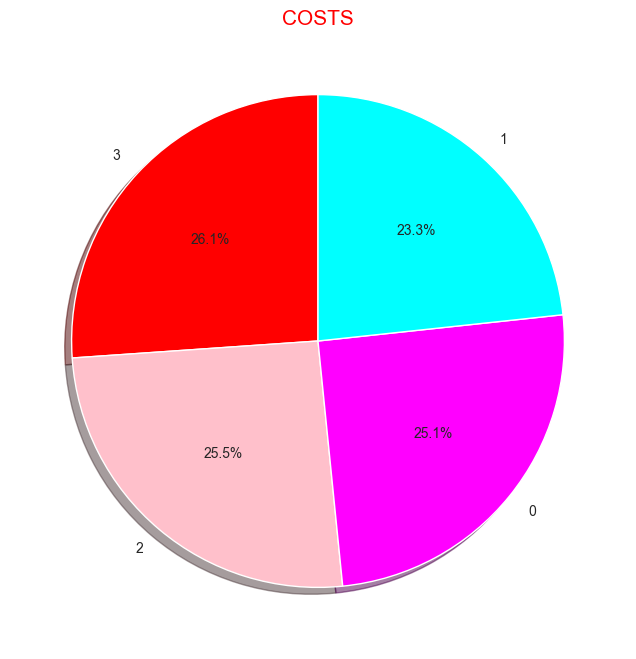

In [117]:
labels = test["price_range"].value_counts().index
sizes = test["price_range"].value_counts()
colors = ['red','pink','magenta','cyan']
plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%',colors=colors,shadow=True, startangle=90)
plt.title('COSTS',color = 'red',fontsize = 15)
plt.show()

## Kesimpulan

- Sebagian besar ponsel-ponsel tersebut ada di kelas 3
- Kemudian Persentase pada kelas 2 dan 0 perbandingan nya tidak terlalu jauh
- Kelas 1 merupakan yang paling sedikit persentase nya 